# Date A Scientist: Making Predictions with Machine Learning 

## Project Goals

This project analyzes data from online dating OKCupid profiles. The purpose is to practice using machine learning techniques to answer questions about the data. This project was completed in Jupyter Notebook.

The goal of this project is to use data anaysis learned from codecademy to explore and visualize the data. I will use machine learning to answer a research question. The question I will be trying to answer with this project is whether body type can be predicted by other aspects of a persons profile

## Analysis

I will be using data visuialization techniques to look at counts, trends, and associations of variables in the first section of this project. In the second part I will use a machine learning classification algorithm to predict body type from other variables on a profile. This could be useful to get a better understanding of what a person looks like if their profile has limited pictures

## Loading and Previewing the Data

Once the necessary libraries have been imported and the data set has been loaded from a CSV file, the data can be previewed to get a sense of what information it contains. 

In [1]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
#loading data and previewing 
data=pd.read_csv("profiles.csv", encoding='utf-8')
data.head()



,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


### Data Characteristics

With a preview of the data, we can start to see the different types of information it contains. Because there are so many column columns, some of them are cut off in the table below. In order to get a full view of the data, the columns and data type are printed below.

In [3]:
print("Total number of columns: ", len(data.columns))
print("Total number of Profiles: ", len(data))
print(data.dtypes)

Total number of columns:  31
Total number of Profiles:  59946
age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object


From the preview of the data and the full print of columns and data types, we can categorize the data types of each column below. 

Columns: 
- **age**: continuous   
- **body_type**: categorical
- **diet**: categorical
- **drinks**: categorical
- **drugs**: categorical
- **education**:categorical
- **ethnicity**: categorical
- **height**: continuous
- **income**: continuous
- **job**: categorical
- **last_online**: date
- **location**: categorical
- **offspring**: categorical
- **orientation**: categorical
- **pets**: categorical
- **religion**: categorical
- **sex**: categorical
- **sign**: categorical
- **smokes**: categorical
- **speaks**: categorical
- **status**: categorical

And a set of open ended essay answers: 
- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…

By printing the unique values of answers in each column, we can see that some columns, like body type or status, have just a few categories that people can choose from, while others, like education are more open-ended. Categories with just a few options could split the data into subsets worth investigating, but more ope-ended answers likely have just a few people in each. 

In [4]:
#unique answers to categorical questions
print("body_type")
print(data.body_type.unique())
print("status")
print(data.status.unique())
print("smokes")
print(data.smokes.unique())
print("orientation")
print(data.orientation.unique())
print("diet")
print(data.diet.unique())
print("drugs")
print(data.drugs.unique())
print("drinks")
print(data.drinks.unique())
print("education")
print(data.education.unique())
print("location")
print(data.location.unique())
print("pets")
print(data.pets.unique())
print("offspring")
print(data.offspring.unique())
print("sign")
print(data.sign.unique())
print("religion")
print(data.religion.unique())



body_type
['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']
status
['single' 'available' 'seeing someone' 'married' 'unknown']
smokes
['sometimes' 'no' nan 'when drinking' 'yes' 'trying to quit']
orientation
['straight' 'bisexual' 'gay']
diet
['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']
drugs
['never' 'sometimes' nan 'often']
drinks
['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']
education
['working on college/university' 'working on space camp'
 'graduated from masters program' 'graduated from college/university'
 'working on two-year college' nan 'graduated from high school'
 'working on masters program' 'graduated from space camp'
 'college/u

### Summary Statistics

Once we know all the variables the data contains, we can calculate some summary statistics that a user may be interested in, such as the total number of people on the app, the breakdown of orientations, and the average age of users.

In [5]:
#summary statistics of data
#exploring counts of profiles
print("Total number of people: ", len(data))
straight_males = data[(data.sex == "m") & (data.orientation == 'straight') ].age.count()
print("number of straight males: ", straight_males)
straight_females = data[(data.sex == "f") & (data.orientation == 'straight') ].age.count()
print("number of straight females: ", straight_females)
gay_bi_males= data[(data.sex == "m") & ((data.orientation == 'gay') | (data.orientation =='bisexual')) ].age.count()
print("number of gay and bisexual males: ", gay_bi_males)
gay_bi_females= data[(data.sex == "f") & ((data.orientation == 'gay') | (data.orientation =='bisexual')) ].age.count()
print("number of gay and bisexual females: ", gay_bi_females)

print("average user age: ", np.round(data.age.mean(), 0))

Total number of people:  59946
number of straight males:  31073
number of straight females:  20533
number of gay and bisexual males:  4756
number of gay and bisexual females:  3584
average user age:  32.0


### Cleaning Data: Removing Qualifiers

From previewing the data, we can see that some columns, like religion and sign, contain additional information that create more categories than there need to be. For example, in the first row, the religion column says "agnosticism and very serious about it" while the second row says "agnosticism but not too serious about it". With all the different qualifiers, there are 45 different categories for religion. For data analysis purposes, it would be easier to process if we get rid of the extra wording and minimize the number of categories. By picking out only the first word in the string and putting that in a new column in the DataFrame, the number of religions can be reduced down to 9. Below, you can see the categories before and after cleaning. The same thing can be done with the sign column, which also contains qualifying text. 

In [6]:
#print number of sign categories before cleaning
print("Signs number of categories: ", data.sign.nunique())
print("Categories: ", data.sign.unique())

Signs number of categories:  48
Categories:  ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'


In [7]:
#create new column, remove any qualifying info, take only first word of sign
#print number of categories after cleaning
data['sign_cleaned']=data.sign.str.split().str.get(0)
print("Cleaned signs nimber of categories", data.sign_cleaned.nunique())
print("Categories: ", data.sign_cleaned.unique())


Cleaned signs nimber of categories 12
Categories:  ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


In [8]:
#print number of religion categories before cleaning
print("Religion number of categories: ", data.religion.nunique())
print("Categories: ", data.religion.unique())

Religion number of categories:  45
Categories:  ['agnosticism and very serious about it'
 'agnosticism but not too serious about it' nan 'atheism' 'christianity'
 'christianity but not too serious about it'
 'atheism and laughing about it' 'christianity and very serious about it'
 'other' 'catholicism' 'catholicism but not too serious about it'
 'catholicism and somewhat serious about it'
 'agnosticism and somewhat serious about it'
 'catholicism and laughing about it' 'agnosticism and laughing about it'
 'agnosticism' 'atheism and somewhat serious about it'
 'buddhism but not too serious about it'
 'other but not too serious about it' 'buddhism'
 'other and laughing about it' 'judaism but not too serious about it'
 'buddhism and laughing about it' 'other and somewhat serious about it'
 'other and very serious about it' 'hinduism but not too serious about it'
 'atheism but not too serious about it' 'judaism'
 'christianity and somewhat serious about it'
 'hinduism and very serious abou

In [9]:
#create new column, remove any qualifying info, take only first word of religion
#print number of religion categories after cleaning
data['religion_cleaned']=data.religion.str.split().str.get(0)
print("Cleaned religion nimber of categories", data.religion_cleaned.nunique())
print("Categories: ", data.religion_cleaned.unique())

Cleaned religion nimber of categories 9
Categories:  ['agnosticism' nan 'atheism' 'christianity' 'other' 'catholicism'
 'buddhism' 'judaism' 'hinduism' 'islam']


## Data Visualizations

Now we can create visualizations of the data to get a better feel for distributions, counts and possible relationships of the variables in the dataset. 

### Gender Distribution

This chart shows the number of men vs women on the app. It shows that there is a significantly larger number of male profiles than female. 

Text(0.5, 1.0, 'Profiles by gender')

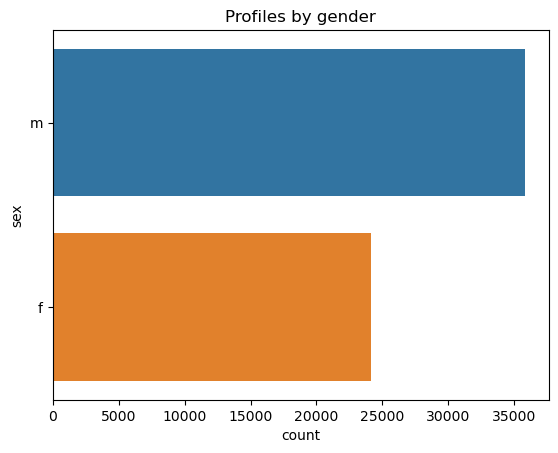

In [10]:
sns.countplot(data=data, y="sex")
plt.title("Profiles by gender")

### Ages

The next three charts take a look at the distribution of ages. The mean is centered around 30, but there is a large distribution. On the second chart, outliers are removed to better see the spread. The third shows the distributions of men's vs women's ages. It shows that the two genders have a pretty similar center and spread. Earlier, we calculated the mean and median ages of users to be 32 and 30 respectively. When the outliers are removed and only users under 50 are considered, those numbers shift slightly down to 31 and 29. 

average user age:  32.0


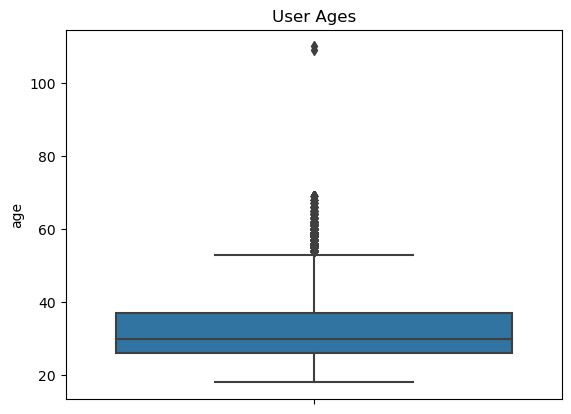

In [11]:
#summary statistics
#exploring ages

print("average user age: ", np.round(data.age.mean(), 0))
plt.figure()
sns.boxplot(y="age", data=data)
plt.title("User Ages")
plt.savefig("Ages Boxplot.png")



average user age (outliers removed):  31.0


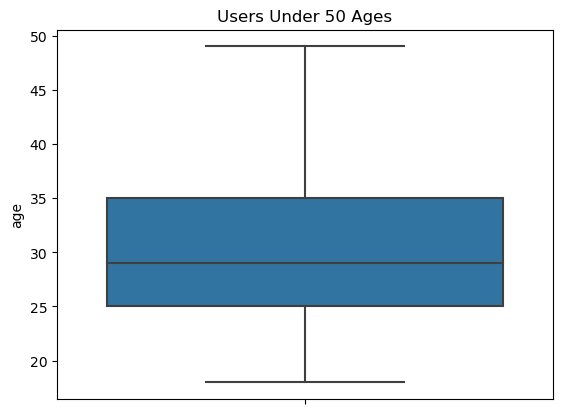

In [12]:
#removing outliers (any ages over 50)
data_under_50 = data[data.age<50]
print("average user age (outliers removed): ", np.round(data_under_50.age.mean(), 0))
plt.figure()
sns.boxplot(y="age", data = data_under_50)
plt.title("Users Under 50 Ages")
plt.savefig("Ages Under 50 Boxplot.png")

average female user age (outliers removed):  31.0
average male user age (outliers removed):  31.0


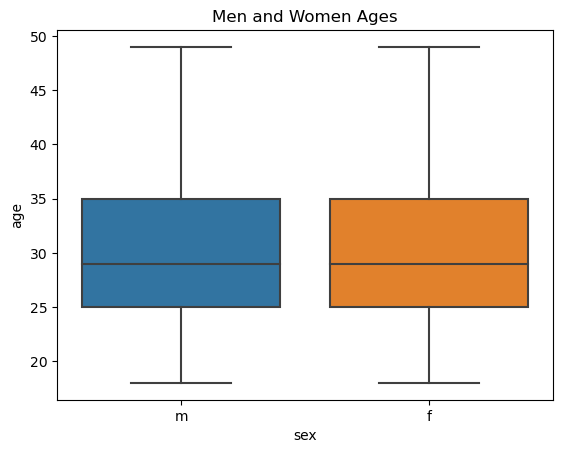

In [13]:
#comparing men and women age under fifty
print("average female user age (outliers removed): ", np.round(data_under_50[data_under_50["sex"]=="f"]["age"].mean(), 0))
print("average male user age (outliers removed): ", np.round(data_under_50[data_under_50["sex"]=="m"]["age"].mean(), 0))
plt.figure()
sns.boxplot(x="sex", y="age", data=data_under_50)
plt.title("Men and Women Ages")
plt.savefig("Men and Women Ages.png")


### Job Types

There are a lot of different job types =, but this graph gives us an idea of which jobs are the most prevalent

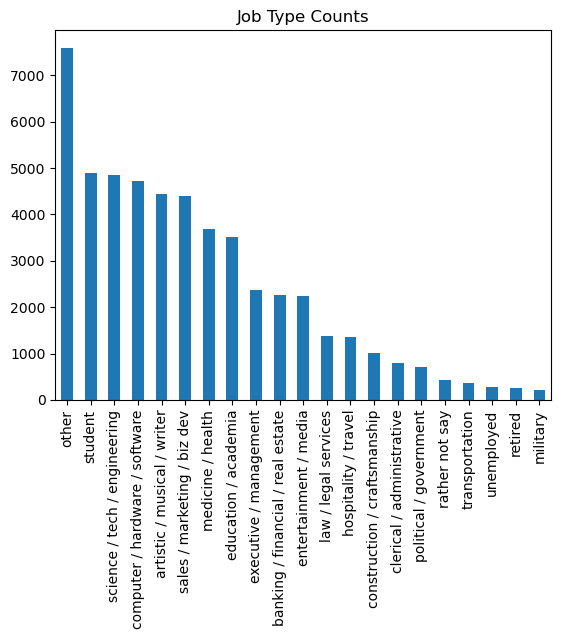

In [14]:
#bar chart of job types
plt.figure()
data.job.value_counts().plot(kind="bar", title= "Job Type Counts")
plt.savefig("Job Type Bar Chart.png")


### Heights

​This histogram shows the distributions of heights for men and women on the app. As one would expect, the heights for women are shorter, but both have normal distributions. 

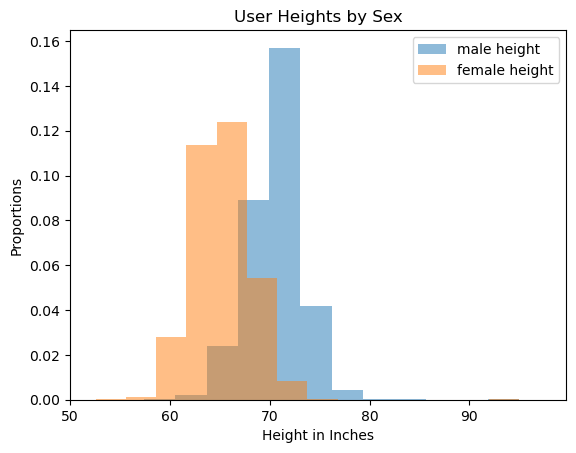

In [15]:
#create overlapping histogram of mens and womens heights
plt.figure()
ax=plt.hist(data[data.sex=='m'].height, label = 'male height', alpha=.5, bins=30, density=True)
ax=plt.hist(data[data.sex=='f'].height, label = 'female height', alpha = .5, bins=30, density=True)
plt.xlim(xmin=50)
plt.legend()
plt.xlabel("Height in Inches")
plt.ylabel("Proportions")
plt.title("User Heights by Sex")
plt.savefig("User heights By Sex Histogram.png")

### Drug Use

Here a pie chart is used to get an idea of the proportion of profiles that use drugs

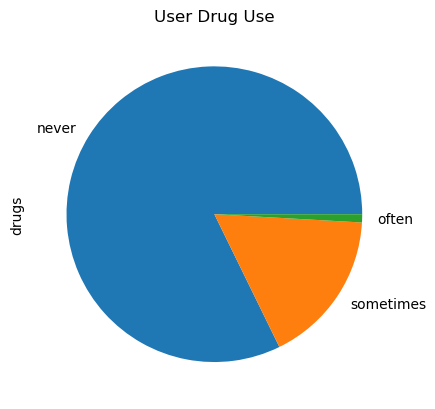

In [16]:
plt.figure()
data.drugs.value_counts().plot(kind = 'pie' )
plt.title("User Drug Use")
plt.savefig("User Drug Use Pie.png")

### Sign

The cleaned up sign data can be used to chart the signs of the different users. It is pretty evenly distributed across the 12 different signs, as we would expect for a random variable in a large sample size. 

Text(0.5, 1.0, 'Star Signs')

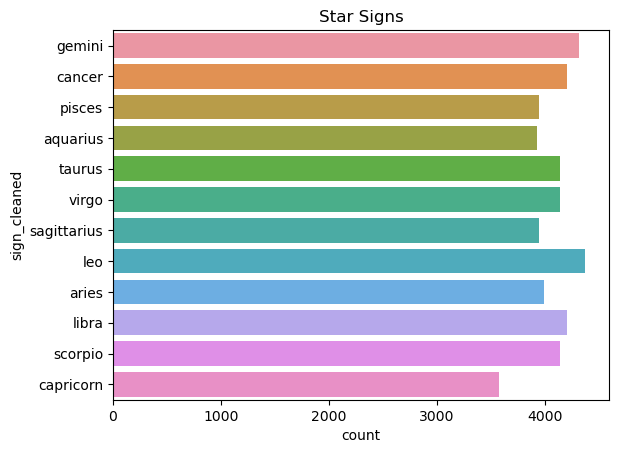

In [17]:
sns.countplot(data=data, y='sign_cleaned')
plt.title("Star Signs")

### Religion

With the cleaned up religion field, the religions of users can be plotted.

Text(0.5, 1.0, 'Religions')

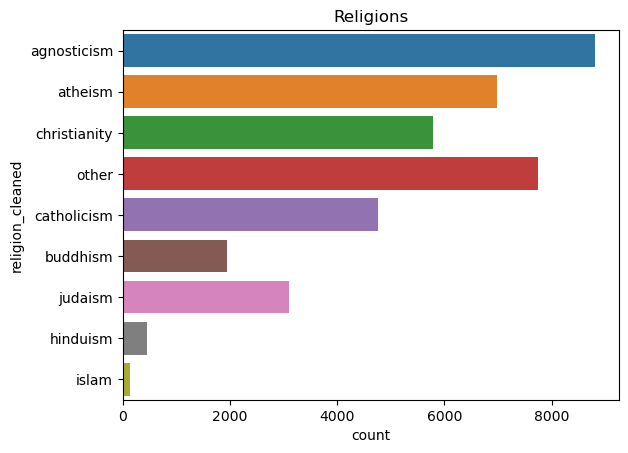

In [18]:
sns.countplot(data=data, y='religion_cleaned')
plt.title("Religions")

### Orientation

This chart shows orientation of users, to get an idea of what the dating pool size is like for each orientation and gender.

Text(0.5, 1.0, 'Sexual Orientations')

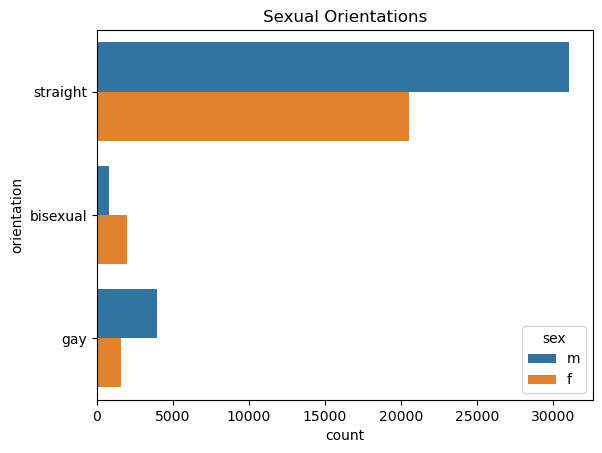

In [19]:
sns.countplot(data=data, y='orientation', hue='sex')
plt.title("Sexual Orientations")

### Body Type

This chart shows how the self-identified body types are distributed. The majority of people identify as just a few types: average, athletic and fit

Text(0.5, 1.0, 'Body Types')

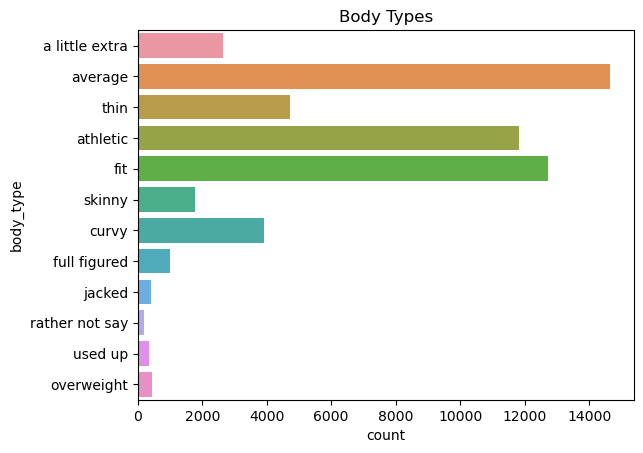

In [20]:
sns.countplot(data=data, y='body_type')
plt.title("Body Types")

### Smokes

Text(0.5, 1.0, 'Smoker')

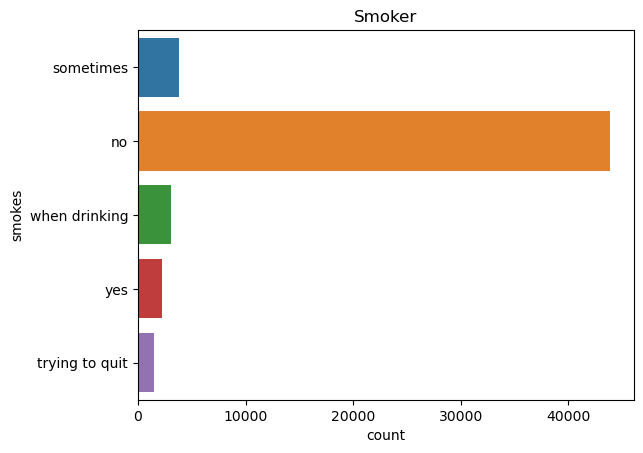

In [21]:
sns.countplot(data=data, y='smokes')
plt.title("Smoker")

### Pet status

Text(0.5, 1.0, 'Pet Status')

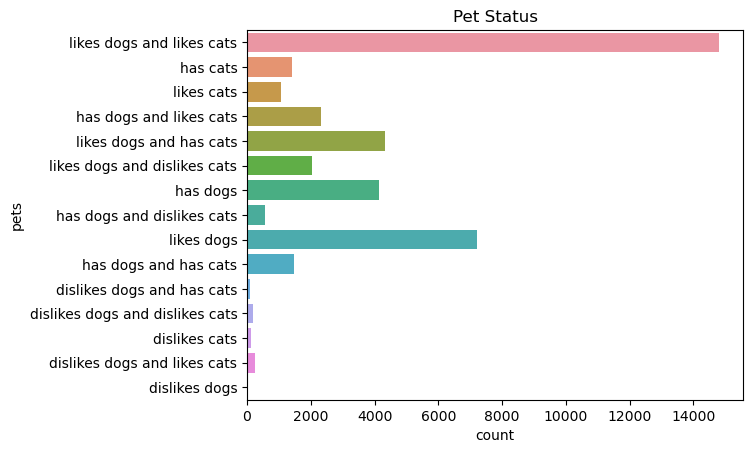

In [22]:
sns.countplot(data=data, y="pets")
plt.title("Pet Status")

## Preparing Data

​Now, the data will need to be prepared before it can be used for our machine learning classification model. It will need to be evaluated to see how much information is missing. When choosing data for our prediction model, it will be best to use fields with a minimal number of null entries. Below are the counts of null entries for each variable. 

We will ignore the essay questions, and focus on the categorical and numerical variables. 

Income, last_online, location, orientation, sex, and status have no null values. 

body_type, drinks, education, ethnicity, height, smokes, and speaks have few null values compared to the rest of the variables. 
​

In [23]:
#print the total number of nan values in each column
data.isnull().sum()

age                     0
body_type            5296
diet                24395
drinks               2985
drugs               14080
education            6628
essay0               5488
essay1               7572
essay2               9638
essay3              11476
essay4              10537
essay5              10850
essay6              13771
essay7              12451
essay8              19225
essay9              12603
ethnicity            5680
height                  3
income                  0
job                  8198
last_online             0
location                0
offspring           35561
orientation             0
pets                19921
religion            20226
sex                     0
sign                11056
smokes               5512
speaks                 50
status                  0
sign_cleaned        11056
religion_cleaned    20226
dtype: int64

### Chosing a subset: 
​In this project, body type will be the variable we are trying to predict. To predict this variable, heights, sex, drinking and drug status, education, ethnicity, and sign may be good predictors. Height, sex, drinks, have very few null values, while education, and ethnicity have relatively low amounts of null values compared to other fields.  
Before creating the subset, height, the one numerical variable we are choosing, should be normalized so that it does not have a disproportionate weight in the classification algorithm we will use. Then the subset can be created with the columns we want to use. Once the subset is created, NA values should also be dropped so that we have a complete dataset.  Below is a preview of the first five rows of our subset. 

In [24]:
#normalizing height values
min_height=data.height.min()
max_height=data.height.max()
data['height_normed']=data['height'].apply(lambda x: (x-min_height)/(max_height-min_height))

In [25]:
#creating our subset and removing na values
cols=["height_normed", 'sex', 'drinks', 'drugs', 'education', 'ethnicity', 'sign_cleaned', 'body_type']
df=data[cols].dropna()
df=df.reset_index()
df.shape
df.head()

,index,height_normed,sex,drinks,drugs,education,ethnicity,sign_cleaned,body_type
0,0,0.787234,m,socially,never,working on college/university,"asian, white",gemini,a little extra
1,1,0.734043,m,often,sometimes,working on space camp,white,cancer,average
2,4,0.691489,m,socially,never,graduated from college/university,"asian, black, other",aquarius,athletic
3,6,0.680851,f,socially,never,graduated from college/university,"white, other",virgo,fit
4,7,0.680851,f,socially,never,graduated from college/university,white,sagittarius,average


### Encoding Categorical Variables

Besides height, all the other variables are categorical. The predictor variables should be encoded so that they can be interpreted by the machine learning model. Below is a preview of what the dataset looks like after encoding

In [26]:
#encoding categorical variables
df=pd.get_dummies(df, columns=['sex', 'drinks', 'drugs', 'education', 'ethnicity', 'sign_cleaned'] )
df.head()

,index,height_normed,body_type,sex_f,sex_m,drinks_desperately,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,...,sign_cleaned_cancer,sign_cleaned_capricorn,sign_cleaned_gemini,sign_cleaned_leo,sign_cleaned_libra,sign_cleaned_pisces,sign_cleaned_sagittarius,sign_cleaned_scorpio,sign_cleaned_taurus,sign_cleaned_virgo
0,0,0.787234,a little extra,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1,0.734043,average,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,4,0.691489,athletic,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,6,0.680851,fit,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,7,0.680851,average,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


## Implementing A Classifier

Using our subset dataframe, lets see if we can implement a KNN Classifier to predict Body Type

### Split Dataframe into features and outcome 

Now that we know what variables we want to use as our predictors and the variable we want to predict, lets split them up so that we can better process the data

In [27]:
df_features=df.drop('body_type', axis=1)
df_features.head()

,index,height_normed,sex_f,sex_m,drinks_desperately,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often,...,sign_cleaned_cancer,sign_cleaned_capricorn,sign_cleaned_gemini,sign_cleaned_leo,sign_cleaned_libra,sign_cleaned_pisces,sign_cleaned_sagittarius,sign_cleaned_scorpio,sign_cleaned_taurus,sign_cleaned_virgo
0,0,0.787234,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0.734043,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,4,0.691489,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0.680851,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,7,0.680851,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [28]:
df_outcome=df['body_type']
df_outcome.head()

0    a little extra
1           average
2          athletic
3               fit
4           average
Name: body_type, dtype: object

### Implementing a KNN Classifier

First, the data is split into a training set and a test set. Then different values of K are looped through to see which produces the best model based on its accuracy score. I looped through K values between 2 and 15, which gave a good range of values to test without taking such a long time to run. The results can be seen on the right: the KNN classifier with the best score had a K of 13 and an accuracy score of around 25%. 

In [29]:
#import necessary libraries for KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [30]:
#split into test and training data
x_train, x_test, y_train, y_test = train_test_split(df_features, df_outcome, test_size=.2, random_state=42)


#### Finding the best K

In [31]:
#create list of k values to try
k_list=list(range(2, 16))
scores=[]

#try each k value and store the accuracy score it produces)
for k in k_list: 
    knn=KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    y_pred=knn.predict(x_test)
    accuracy=accuracy_score(y_test, y_pred)
    #knn_score=knn.score(x_test, y_test)
    scores.append(accuracy)



In [32]:
#find best score and the k it corresponds with
best_score_loc=scores.index(max(scores))
best_score=max(scores)
best_k=k_list[best_score_loc]
print("Best Score: " , best_score)
print("Best K: ", best_k)

Best Score:  0.24957954927682477
Best K:  13


Even going through a number of K's, the score is not very high. Perhaps if a few predictor variables are dropped, a higher score can be achieved. A slightly tweaked data set with Ethnicity and Sign removed can be run through the same process. 

#### Adjusting Features

Even going through a number of Ks, our best score is not very high. Lets try taking out a few predictor variables to see if we can get a higher score

Removing Ethnicity and Signs


In [33]:
#create new dataframe to work with, excluding ethnicity and sign
cols=["height_normed", 'sex', 'drinks', 'drugs', 'education', 'body_type']
df2=data[cols].dropna()
df2=df2.reset_index()

#encode categorical variables
df2=pd.get_dummies(data=df2, columns=['sex', 'drinks', 'drugs', 'education'] )
df2.head()

,index,height_normed,body_type,sex_f,sex_m,drinks_desperately,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,...,education_space camp,education_two-year college,education_working on college/university,education_working on high school,education_working on law school,education_working on masters program,education_working on med school,education_working on ph.d program,education_working on space camp,education_working on two-year college
0,0,0.787234,a little extra,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1,0.734043,average,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4,0.691489,athletic,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,6,0.680851,fit,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,7,0.680851,average,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#split into features and outcome variables
df2_features=df2.drop('body_type', axis=1)
df2_features.head()
df2_outcome=df2['body_type']



In [35]:
#try knn classifier with new dataset
x_train, x_test, y_train, y_test = train_test_split(df2_features, df2_outcome, test_size=.2, random_state=42)
k_list=list(range(2, 16))
scores=[]

for k in k_list: 
    knn=KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    y_pred=knn.predict(x_test)
    accuracy=accuracy_score(y_test, y_pred)
    #knn_score=knn.score(x_test, y_test)
    scores.append(accuracy)


In [36]:
best_score_loc=scores.index(max(scores))
best_score=max(scores)
best_k=k_list[best_score_loc]
print("Best Score: " , best_score)
print("Best K: ", best_k)

Best Score:  0.2363220863019223
Best K:  12


Using this reduced data set, the results are actually worse, with an accuracy score around 24%. Since removing variables did not help, moving forward the original subset will be used and we will explore other options to try and improve model performance.

### Implementing a Logistic Regression Classifier

Even after adjusting our features, we are still getting a low score with the KNN Classifier. Lets see if we can get a better score with a Logistic Regression Classifier, starting with the original subset of features. ​Even after adjusting our features, we are still getting a low score with the KNN Classifier. When a logistic regression is initiated and trained,  it produces an accuracy score of around 28%.

In [37]:
#import required library logistic regression
from sklearn.linear_model import LogisticRegression

In [38]:
#split into test and train sets
x_train, x_test, y_train, y_test = train_test_split(df_features, df_outcome, test_size=.2, random_state=42)

In [39]:
#train model and print resulting accuracy score
model=LogisticRegression()
model.fit(x_train, y_train)
print("Logistic Regression Model Score: ", model.score(x_test, y_test))

Logistic Regression Model Score:  0.282711066263034


### Implementing a Decision Tree Classifier

Our Logistic Regression Classifier performed slightly better than our KNN Classifier, but still did not perform great. Let's see if we can beat that score with a decision tree classifier. Similar to the way different K values were tested with the KNN classifier, different maximum depths of decision tree classifiers can be tested to find what max depth produces the best score. Maximum depths of 1 through 10 were tested. The best results were with a decision tree with a maximum depth of only four, producing a score of .30. This is another slight improvement over the Logistic Regression Classifier


In [40]:
#import library for decision tree classifier
from sklearn.tree import DecisionTreeClassifier


#### Determining Best Depth

In [41]:
#create list of depths to test
depths=list(range(1, 11))
scores=[]

#try each depth and store resulting accuracy score
for depth in depths: 
    dtree=DecisionTreeClassifier(max_depth=depth)
    dtree.fit(x_train, y_train)
    score=dtree.score(x_test, y_test)
    scores.append(score)

    


In [42]:
#find best score and corresponding depth 
best_score=max(scores)
best_score_loc=scores.index(best_score)
best_depth=depths[best_score_loc]
print('Best Score: ', best_score)
print("Best Depth: ", best_depth)

Best Score:  0.3003699966363942
Best Depth:  4


### Logistic Regression with Regularization

Our Decision Tree Classifier performs slightly better than our Linear Regression Classifier. Lets see if we can improve our performance with regularization

#### Ridge Regulariation 

Lets revisit the logistig regression classifier, but this time with Ridge regularization. We'll tune the hyperparameter C, then fit a logistic regression classifier with our chosen C and ridge regularization

In [43]:
#import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegressionCV

In [44]:
#create list of C values to try, iterate though and find C that results in highest accuracy
C_array=np.logspace(-3, 2, 100)
model=LogisticRegressionCV(Cs=C_array, penalty='l2', scoring = 'accuracy', cv=5, random_state=40, max_iter=100000)
model.fit(x_train, y_train)
best_C=model.C_.mean()
print(best_C)

44.30621457583877


In [45]:
#create logistic regression model with best C found above
lr_model=LogisticRegression(penalty = 'l2', solver = 'liblinear', C=best_C)
lr_model.fit(x_train, y_train)
score=lr_model.score(x_test, y_test)
print("Ridge Regularized Logistic Regression Score: ", score)

Ridge Regularized Logistic Regression Score:  0.28321560713084426


### Random Forest Classifier

Of the base models we tried, the decision tree performed the best, so let's try a random forest classifier and see if we can improve our model performance even more. For this model, 100 base Decision Tree Estimators were used to produce the random forest. The Random Forest Classifier may perform differently at different depths than the simple Decision Tree Classifier, so once again depths can be iterated through to try and find the best one for this model. 

The best depth for this model does end up being different from the Decision Tree Classifier, with a best score at a maximum depth of 12. However, the best score with this model is only a marginal improvement over the simple Decision Tree Classifier. Considering how small the improvement was, it does not seem worth the computational power to generate 100 Decision Trees with this model vs a single Decision Tree Classifier. 

In [50]:
#import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
#create list of depths to try
depths = list(range(1, 11))
accuracies=[]

#find accuracy at each depth tested
for depth in depths: 
    rf=RandomForestClassifier(max_depth = depth, n_estimators=100)
    rf.fit(x_train, y_train)
    accuracy=rf.score(x_test, y_test)
    accuracies.append(accuracy)


In [52]:
#find best accuracy and the depth it corresponds to 
best_score=max(accuracies)
best_score_loc=accuracies.index(best_score)
best_depth=depths[best_score_loc]
print("Best accuracy score: ", best_score)
print("Best decision tree depth: ", best_depth)

Best accuracy score:  0.30440632357887654
Best decision tree depth:  10


In [53]:
grad_classifier= GradientBoostingClassifier(n_estimators=100)
grad_classifier.fit(x_train, y_train)
y_pred=grad_classifier.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

0.29616548940464177


## Conclusion and Next Steps

With all the different models tried, the best accuracy the machine learning algorithms could achieve is around 30%. Considering there are 12 possible categories, this model is better than random guessing, but still not very accurate. The next steps for this analysis would be to use filter selection methods to see if there is a better subset of features that could predict body type with better accuracy. Perhaps self-reported body type is not a very predictable variable, and a different one would be better suited for prediction. 